👥 Cohort Analysis & Retention Rate

## Cohort Analysis
Cohort analysis involves dividing users into distinct groups (cohorts) based on shared characteristics — in this case, the **time of user acquisition**. This method helps track how different groups behave over time in terms of engagement and retention.

**Example:**  
You might group users by the month they signed up, then observe how their activity (e.g., conversion rate, lifetime value) changes over time. This reveals trends, anomalies, and areas for improvement in user satisfaction and retention.

## Retention Rate Time-Based Cohort Analysis
This is a focused form of cohort analysis that examines how long users stay engaged across multiple time periods.

**Steps:**
- Create cohorts based on acquisition dates.
- Measure the percentage of users who remain active after specific intervals (e.g., 1 month, 3 months).
- Compare retention rates across cohorts to identify patterns and inform decisions.

**Purpose:**  
This analysis helps pinpoint which cohorts retain better or worse, offering insights into what drives user loyalty or drop-off. It’s valuable for refining marketing, product development, and customer support strategies.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
# Load dataset
data = pd.read_csv(r"C:\Users\elsingy\Documents\AMDARI DS\cohort\Dataset_ecommerce.csv")
data.head().T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
CustomerID,17850.0,17850.0,17850.0,17850.0,17850.0
StockCode,SC1734,SC2088,SC3463,SC6228,SC2149
Description,Electronics,Furniture,Books,Toys,Toys
Quantity,65,95,78,15,50
UnitPrice,10.23,19.61,61.49,24.73,38.83
Country,Egypt,Mali,Mali,South Africa,Rwanda


In [15]:
# Descrptive statistics
data.describe(include = "all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [16]:
# Check Missing values
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [17]:
# Drop the missing values
data.dropna(inplace = True)

In [19]:
# Check for Info dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [20]:
# Convert date to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [21]:
data.info()data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [25]:
df = data.copy()

# EXPLORATORY DATA ANALYSIS

In [40]:
# Analysis by Country
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()

In [41]:
quantity_by_country.head(3)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229


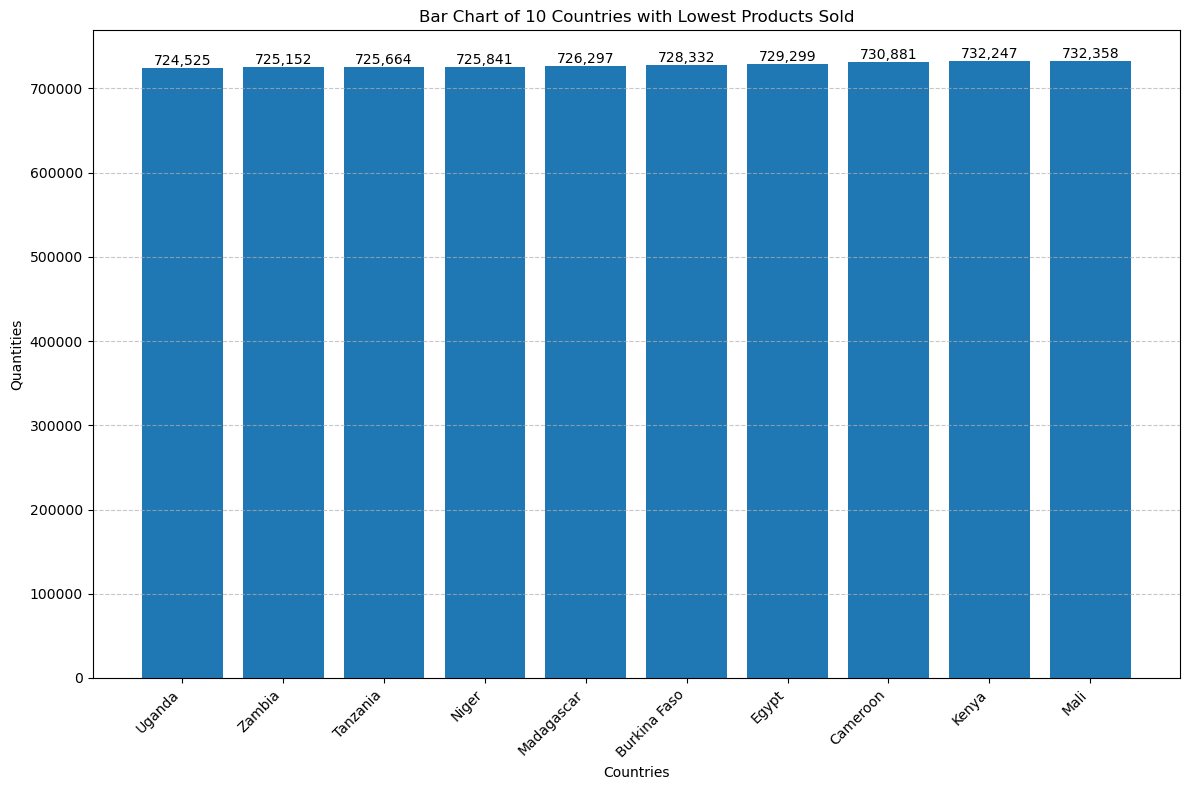

Range of values: 7833
Percentage difference between highest and lowest: 1.081122114488803 %


In [57]:
# Create a new DataFrame for plotting the least countries
bottom_countries = data.groupby("Country")["Quantity"].sum()
bottom_10 = bottom_countries.sort_values(ascending=True).head(10).reset_index()

# Plot with adjusted y-axis to highlight differences
plt.figure(figsize=(12, 8))
bars = plt.bar(bottom_10["Country"], bottom_10["Quantity"])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', rotation=0)

plt.xlabel("Countries")
plt.ylabel("Quantities")
plt.title("Bar Chart of 10 Countries with Lowest Products Sold")

# Set y-axis to start from 0 or slightly below the minimum
min_val = min(0, bottom_10["Quantity"].min() * 0.995)  # Start from 0 or slightly below if negative
plt.ylim(min_val, None)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Range of values:", bottom_10["Quantity"].max() - bottom_10["Quantity"].min())
print("Percentage difference between highest and lowest:", 
      (bottom_10["Quantity"].max() - bottom_10["Quantity"].min()) / bottom_10["Quantity"].min() * 100, "%" 
      if bottom_10["Quantity"].min() != 0 else "N/A (division by zero)")

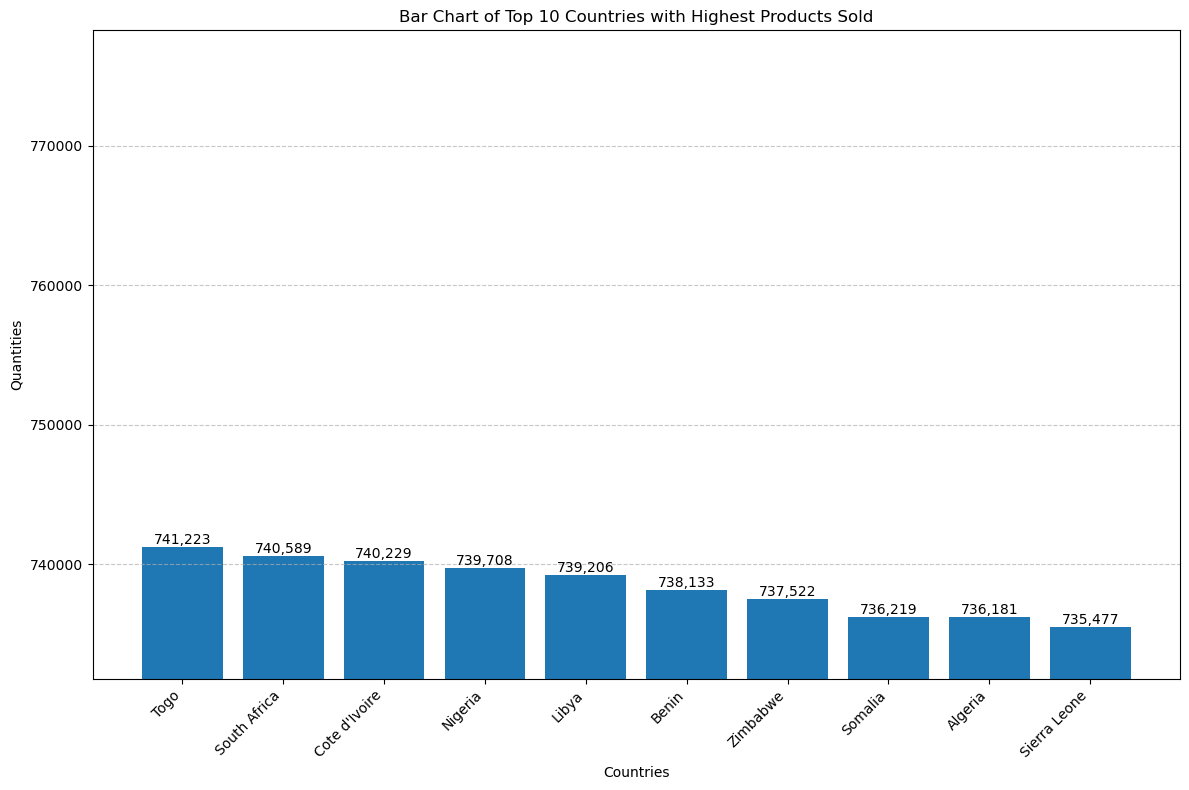

Range of values: 5746
Percentage difference between highest and lowest: 0.7812616845938078 %


In [56]:
# Create a new DataFrame for plotting
top_countries = data.groupby("Country")["Quantity"].sum()
top_10 = top_countries.sort_values(ascending=False).head(10).reset_index()

# Plot with adjusted y-axis to highlight differences
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10["Country"], top_10["Quantity"])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', rotation=0)

plt.xlabel("Countries")
plt.ylabel("Quantities")
plt.title("Bar Chart of Top 10 Countries with Highest Products Sold")

# Set y-axis to start from a value close to the minimum to emphasize differences
min_val = top_10["Quantity"].min() * 0.995  # Start slightly below the minimum
plt.ylim(min_val, None)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Range of values:", top_10["Quantity"].max() - top_10["Quantity"].min())
print("Percentage difference between highest and lowest:", 
      (top_10["Quantity"].max() - top_10["Quantity"].min()) / top_10["Quantity"].min() * 100, "%")

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [63]:
# Analysis of Country and Number of Customers
country_to_customer = data.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customer = country_to_customer.sort_values("CustomerID", ascending = False).reset_index()
country_to_customer

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049
5,18,Sierra Leone,3046
6,11,Mali,3044
7,0,Algeria,3043
8,17,Senegal,3040
9,14,Niger,3039


In [64]:
country_to_customer.head(3)

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


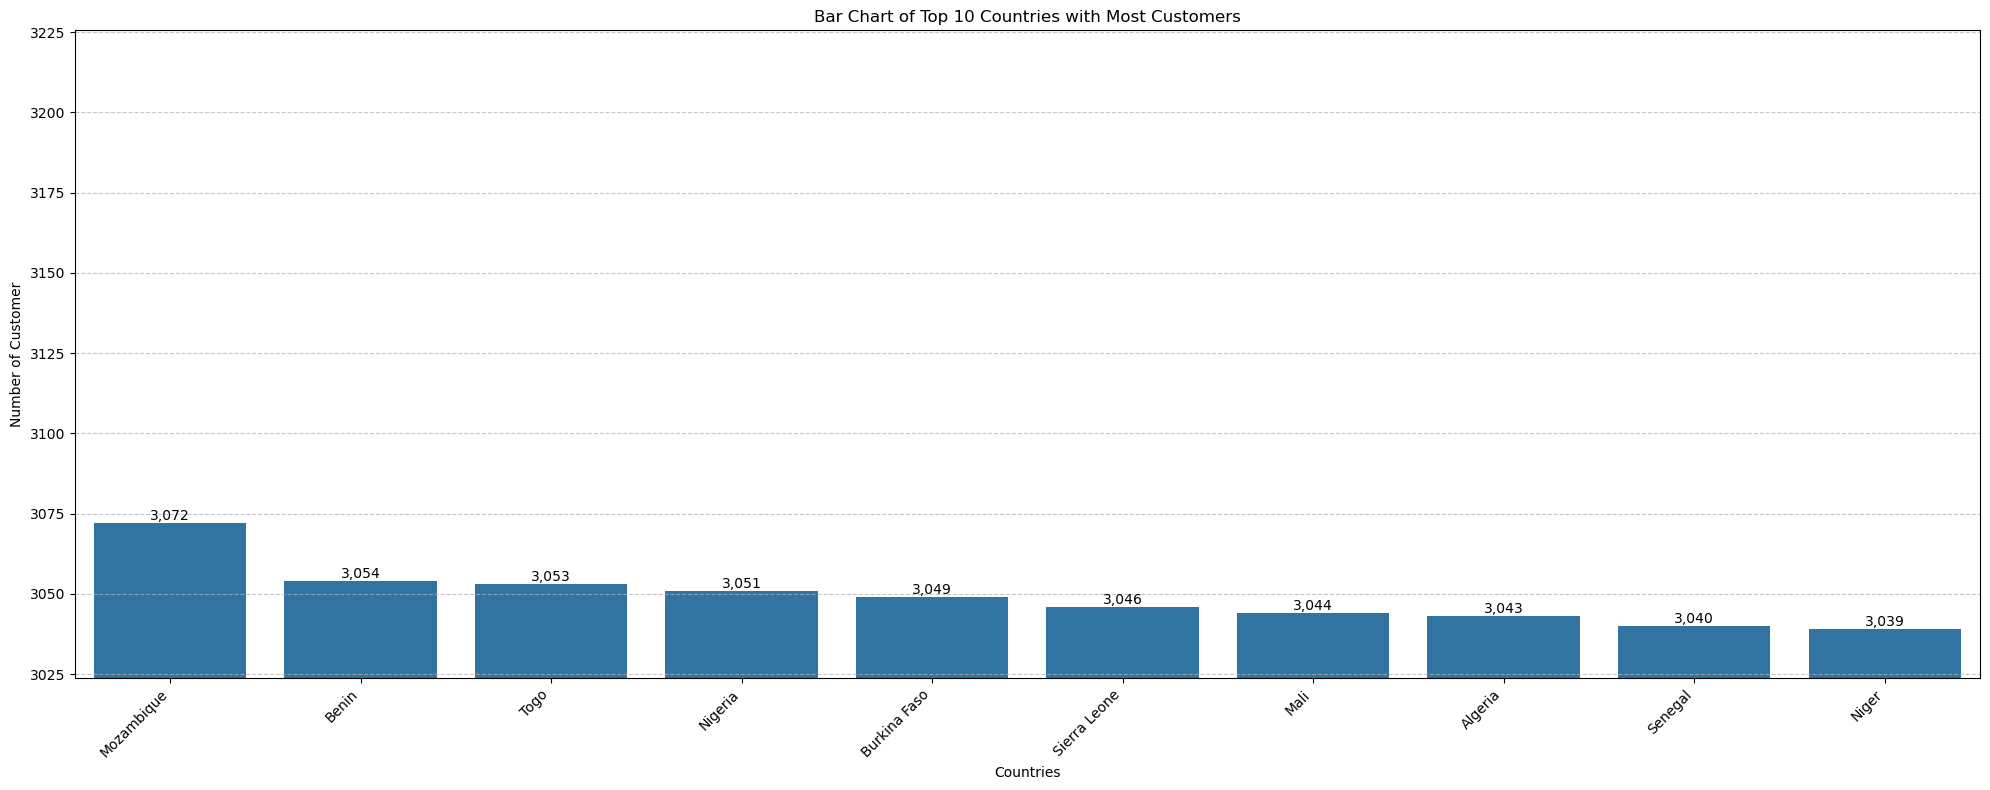

Range of values: 33
Percentage difference between highest and lowest: 1.085883514313919 %


In [68]:
# Plot top 10 Countries with most Customers
top_countries_to_customer = country_to_customer.head(10)

plt.figure(figsize = (20,8))
# Store the returned bar container from barplot
bars = sns.barplot(x = "Country", y = "CustomerID", data = top_countries_to_customer)

# Add value labels on top of each bar
for bar in bars.patches:  # Use .patches instead of bars directly
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', rotation=0)

plt.xlabel("Countries")
plt.ylabel("Number of Customer")
plt.title("Bar Chart of Top 10 Countries with Most Customers")

# Set y-axis to start from a value close to the minimum to emphasize differences
min_val = top_countries_to_customer["CustomerID"].min() * 0.995  # Changed top_10 to top_countries_to_customer
plt.ylim(min_val, None)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Range of values:", top_countries_to_customer["CustomerID"].max() - top_countries_to_customer["CustomerID"].min())
print("Percentage difference between highest and lowest:", 
      (top_countries_to_customer["CustomerID"].max() - top_countries_to_customer["CustomerID"].min()) / 
      top_countries_to_customer["CustomerID"].min() * 100, "%")

# Sales trend Visualization

In [69]:
df.describe()

,InvoiceDate,CustomerID,Quantity,UnitPrice
count,406829,406829.000000,406829.000000,406829.000000
mean,2011-07-10 16:30:57.879207424,15287.690570,50.478471,50.477654
min,2010-12-01 08:26:00,12346.000000,1.000000,1.000000
25%,2011-04-06 15:02:00,13953.000000,25.000000,25.710000
50%,2011-07-31 11:48:00,15152.000000,50.000000,50.430000
75%,2011-10-20 13:06:00,16791.000000,75.000000,75.170000
max,2011-12-09 12:50:00,18287.000000,100.000000,100.000000
std,NaN,1713.600303,28.872921,28.573075


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [74]:
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period('M'))["Quantity"].sum()
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

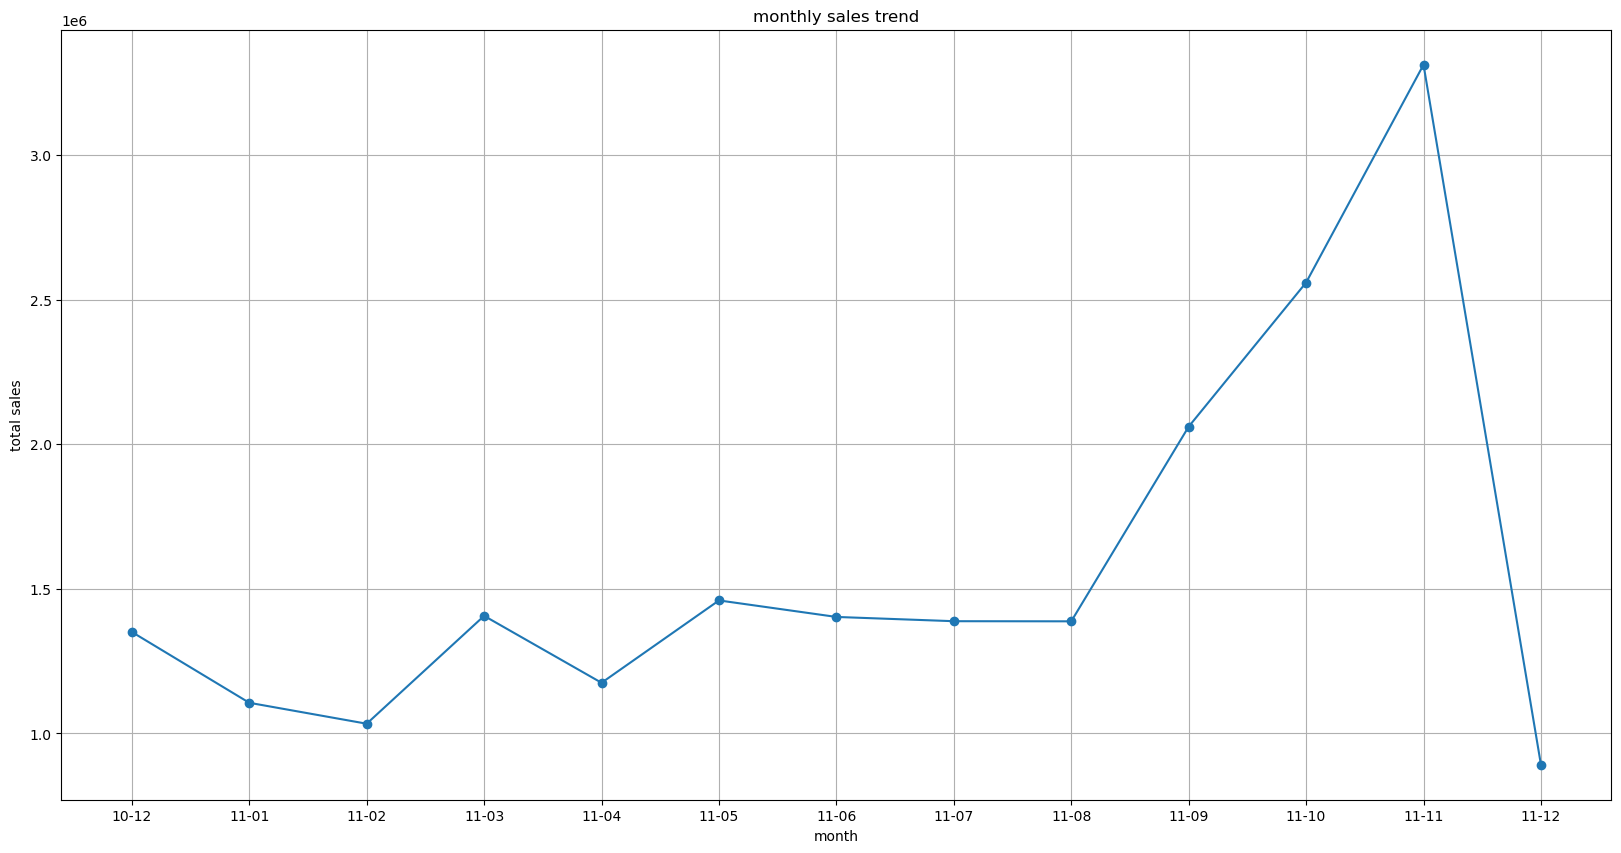

In [76]:
# Create a line-plot
plt.figure(figsize = (20,10))
plt.plot(monthly_sales.index.strftime("%y-%m"), monthly_sales.values, marker = 'o', linestyle = '-')
plt.xlabel("month")
plt.ylabel("total sales")
plt.title("monthly sales trend")

plt.grid(True)
plt.show()

### Shows high sales within August to November before plummeting down again!

# Cohort Analysis

In [87]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [79]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [82]:
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)

In [83]:
def get_cohort_date(data):
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")
    return data["cohort date"]

In [84]:
data["cohort date"] = get_cohort_date(data)

In [85]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


# Cohort index

In [102]:
def get_year_and_month(data, col):

    month = data(col).dt.month
    year = data(col).dt.year
    return month, year

In [103]:
first_month, first_year = get_year_month(data, "cohort date")

In [109]:
least_month, least_year = get_year_month(data, "InvoiceDate")

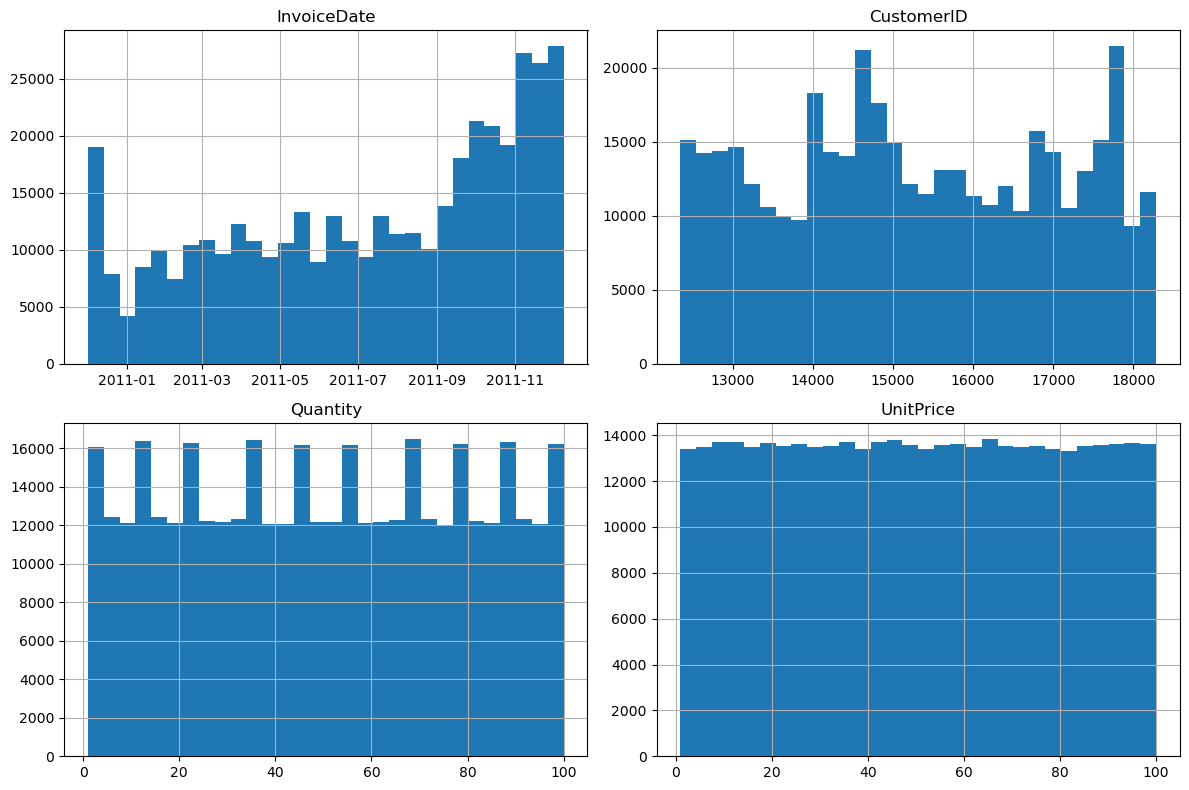

In [23]:
# 📈 3. Visualize distributions of comparable numeric columns
# A quick histogram grid is perfect for spotting patterns.
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()

In [24]:
# 🔗 4. Compare relationships between numeric columns
# A correlation heatmap gives you a fast sense of which columns move together.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

ValueError: could not convert string to float: 'C536379'

<Figure size 1000x600 with 0 Axes>

In [10]:
df.nunique()

InvoiceNo      25900
InvoiceDate    23260
CustomerID      4372
StockCode       9000
Description       10
Quantity         100
UnitPrice       9901
Country           28
dtype: int64

In [11]:
df['Country'].value_counts().head(10)

Country
Cote d'Ivoire    19651
Sierra Leone     19533
Benin            19525
Nigeria          19520
Cameroon         19451
Ethiopia         19427
Mozambique       19424
Rwanda           19416
Togo             19410
Senegal          19402
Name: count, dtype: int64

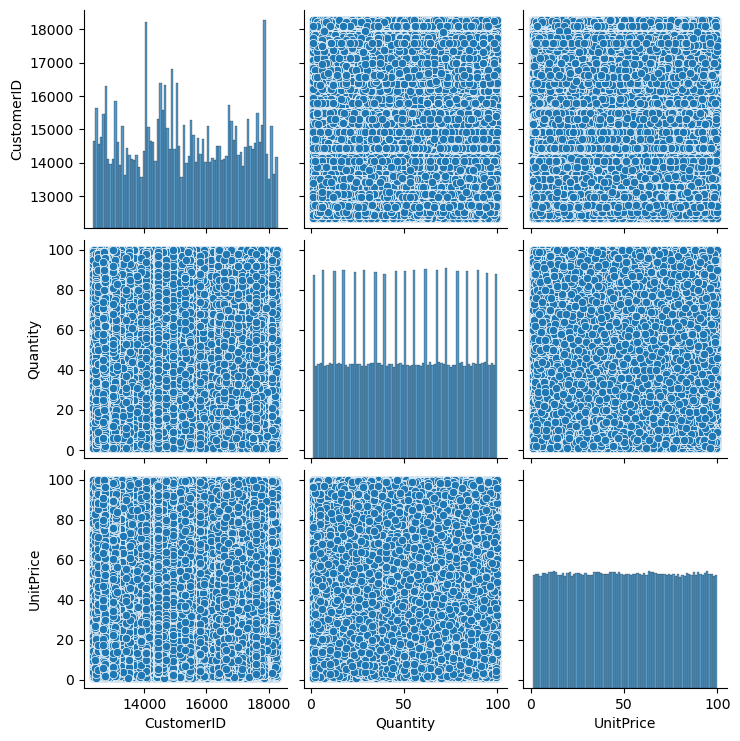

In [12]:
sns.pairplot(df.select_dtypes(include='number'))

In [13]:
pip install ydata-profiling

  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/678.1 kB ? eta -:--:--
   --------------------------------------- 678.1/678.1 kB 15.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 3.1/3.1 MB 16.5 MB/s eta 0:00:00
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)

   ------ ---------------------------------  2/13 [filetype]
  Attempting uninstall: typing-extensions
   ------ ---------------------------------  2/13 [filetype]
    Found existing installation: typing_extensions 4.12.2
   ------ ---------------------------------  2/13 [filetype]
    Uninstalling typing_extensions-4.12.2:
   ------ ---------------------------------  2/13 [filetype]
   --------- ------------------------------  3/13 [typing-extensions]
   --------- ------------------------------  3/13 [typing-extensions]
   --------- ------------------------

  You can safely remove it manually.


In [14]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                   | 0/8 [00:00<?, ?it/s]
%|███▍                       | 1/8 [00:03<00:25,  3.57s/it]
100%|███████████████████████████| 8/8 [00:03<00:00,  2.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]